# Import libraries and Data

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split

In [11]:
# read dataframe
df = pd.read_csv('alzheimers_disease_data.csv')
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# Clean Data

In [12]:
# drop unimportaint colums
df.drop(columns=['PatientID', 'DoctorInCharge'], inplace=True)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


# Data Summarization

In [13]:
df.shape

(2149, 33)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2149 non-null   int64  
 1   Gender                     2149 non-null   int64  
 2   Ethnicity                  2149 non-null   int64  
 3   EducationLevel             2149 non-null   int64  
 4   BMI                        2149 non-null   float64
 5   Smoking                    2149 non-null   int64  
 6   AlcoholConsumption         2149 non-null   float64
 7   PhysicalActivity           2149 non-null   float64
 8   DietQuality                2149 non-null   float64
 9   SleepQuality               2149 non-null   float64
 10  FamilyHistoryAlzheimers    2149 non-null   int64  
 11  CardiovascularDisease      2149 non-null   int64  
 12  Diabetes                   2149 non-null   int64  
 13  Depression                 2149 non-null   int64

All variables are numeric and there are no missing values

In [15]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,9.999840,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df['Diagnosis'].value_counts(normalize=True)

Diagnosis
0    0.646347
1    0.353653
Name: proportion, dtype: float64

# Data Visualization

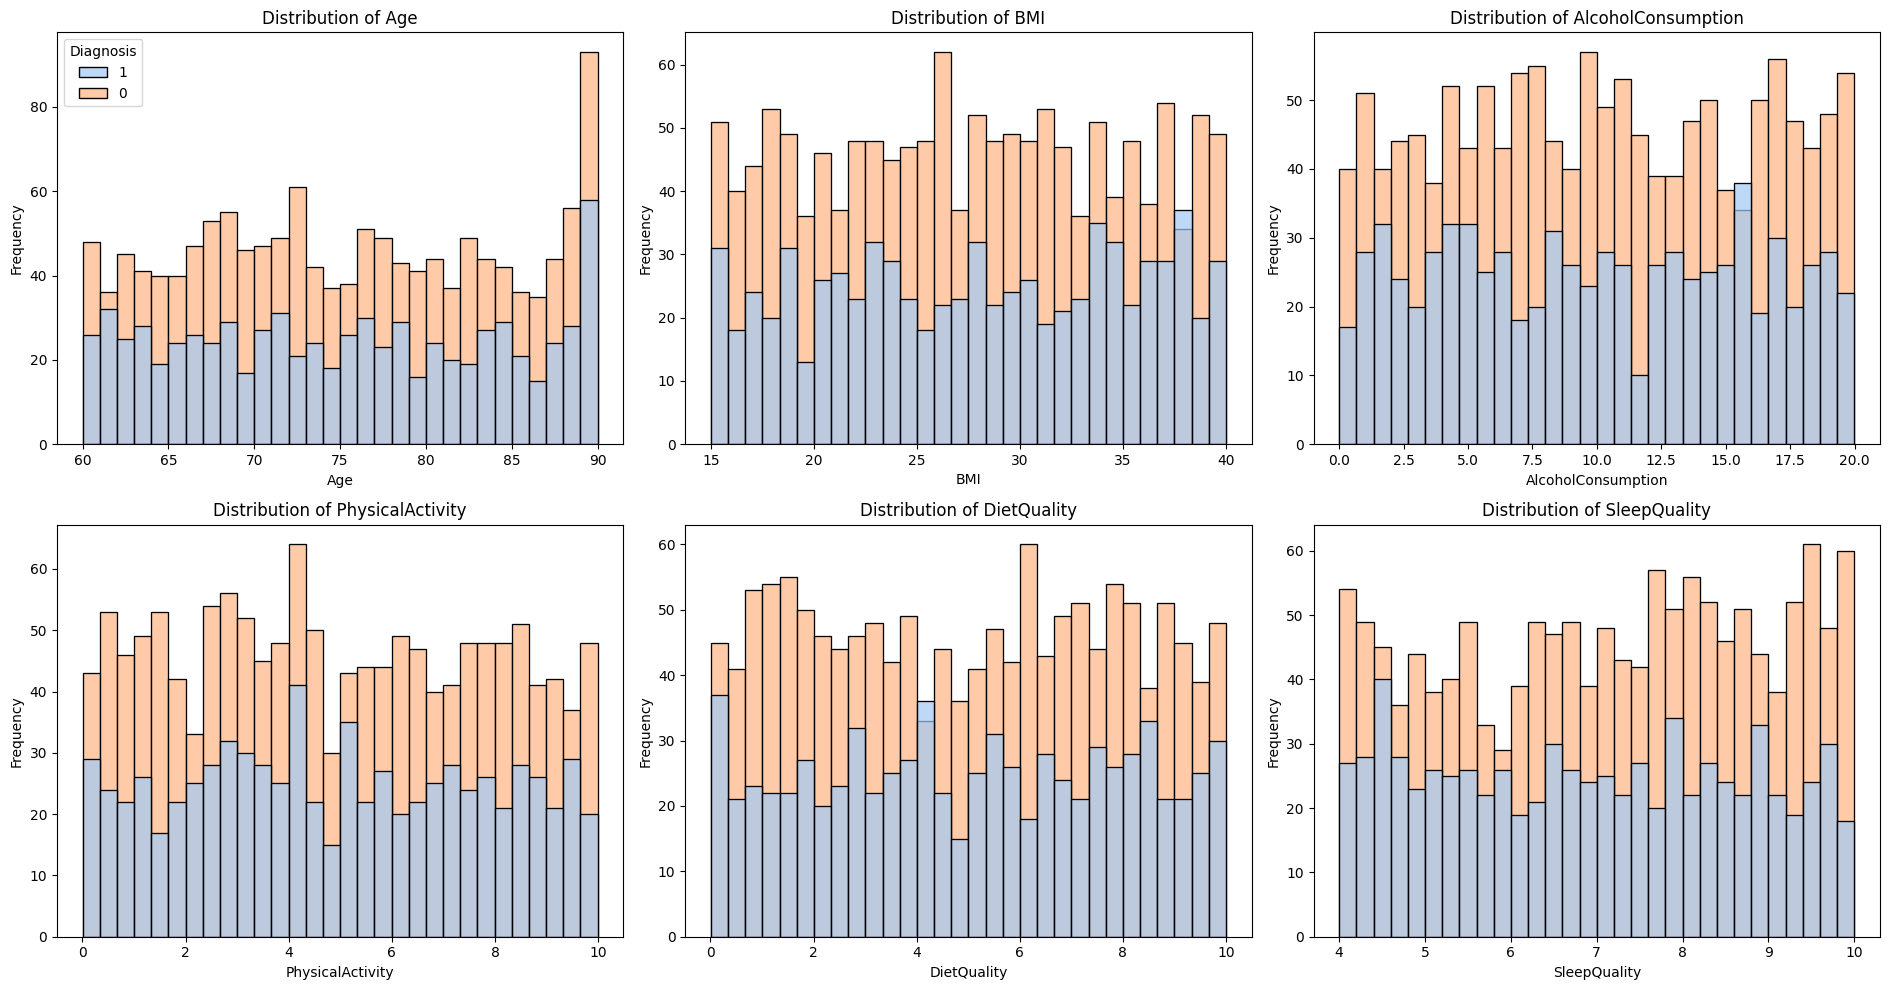

In [17]:
warnings.simplefilter(action='ignore', category=FutureWarning)

fig, axes = plt.subplots(2, 3, figsize=(19, 10))

hue_order = [1, 0]  # Adjust the order here

# Plotting each histogram 
sns.histplot(ax=axes[0, 0], x='Age', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], x='BMI', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of BMI')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 2], x='AlcoholConsumption', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of AlcoholConsumption')
axes[0, 2].set_xlabel('AlcoholConsumption')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], x='PhysicalActivity', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of PhysicalActivity')
axes[1, 0].set_xlabel('PhysicalActivity')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='DietQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of DietQuality')
axes[1, 1].set_xlabel('DietQuality')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 2], x='SleepQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of SleepQuality')
axes[1, 2].set_xlabel('SleepQuality')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Above there is not much to see with differences in distributions

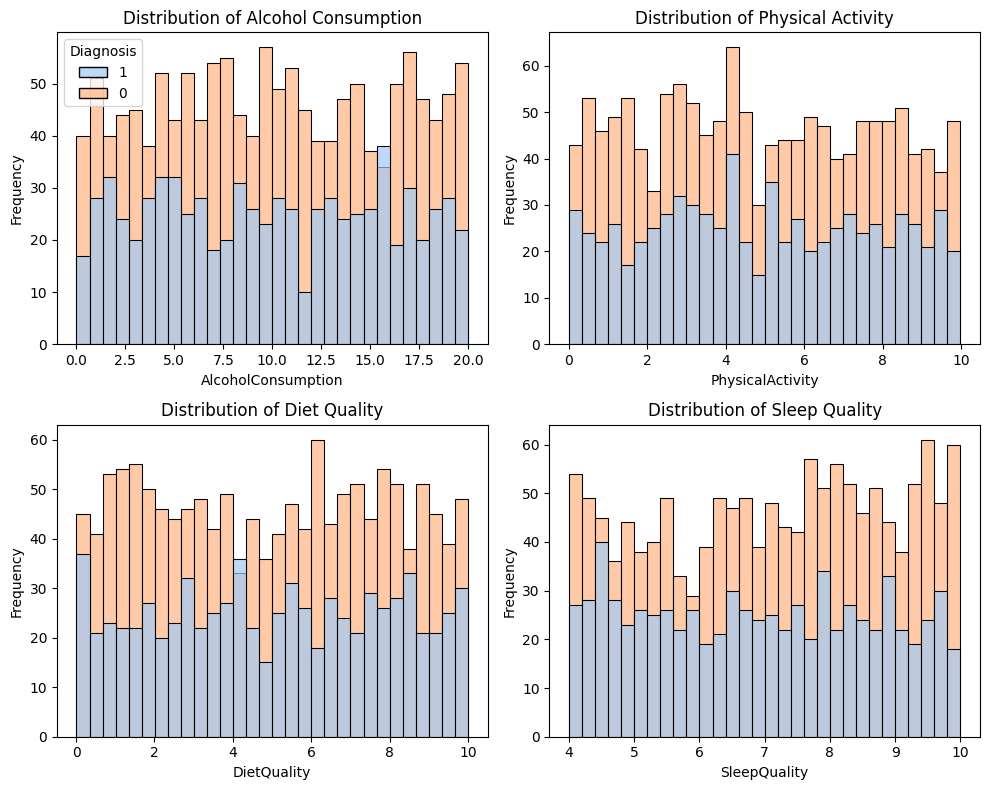

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plotting each histogram of lifestyle habits
sns.histplot(ax=axes[0, 0], x='AlcoholConsumption', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of Alcohol Consumption')
axes[0, 0].set_xlabel('AlcoholConsumption')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], x='PhysicalActivity', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Physical Activity')
axes[0, 1].set_xlabel('PhysicalActivity')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], x='DietQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Diet Quality')
axes[1, 0].set_xlabel('DietQuality')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='SleepQuality', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='Distribution of Sleep Quality')
axes[1, 1].set_xlabel('SleepQuality')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

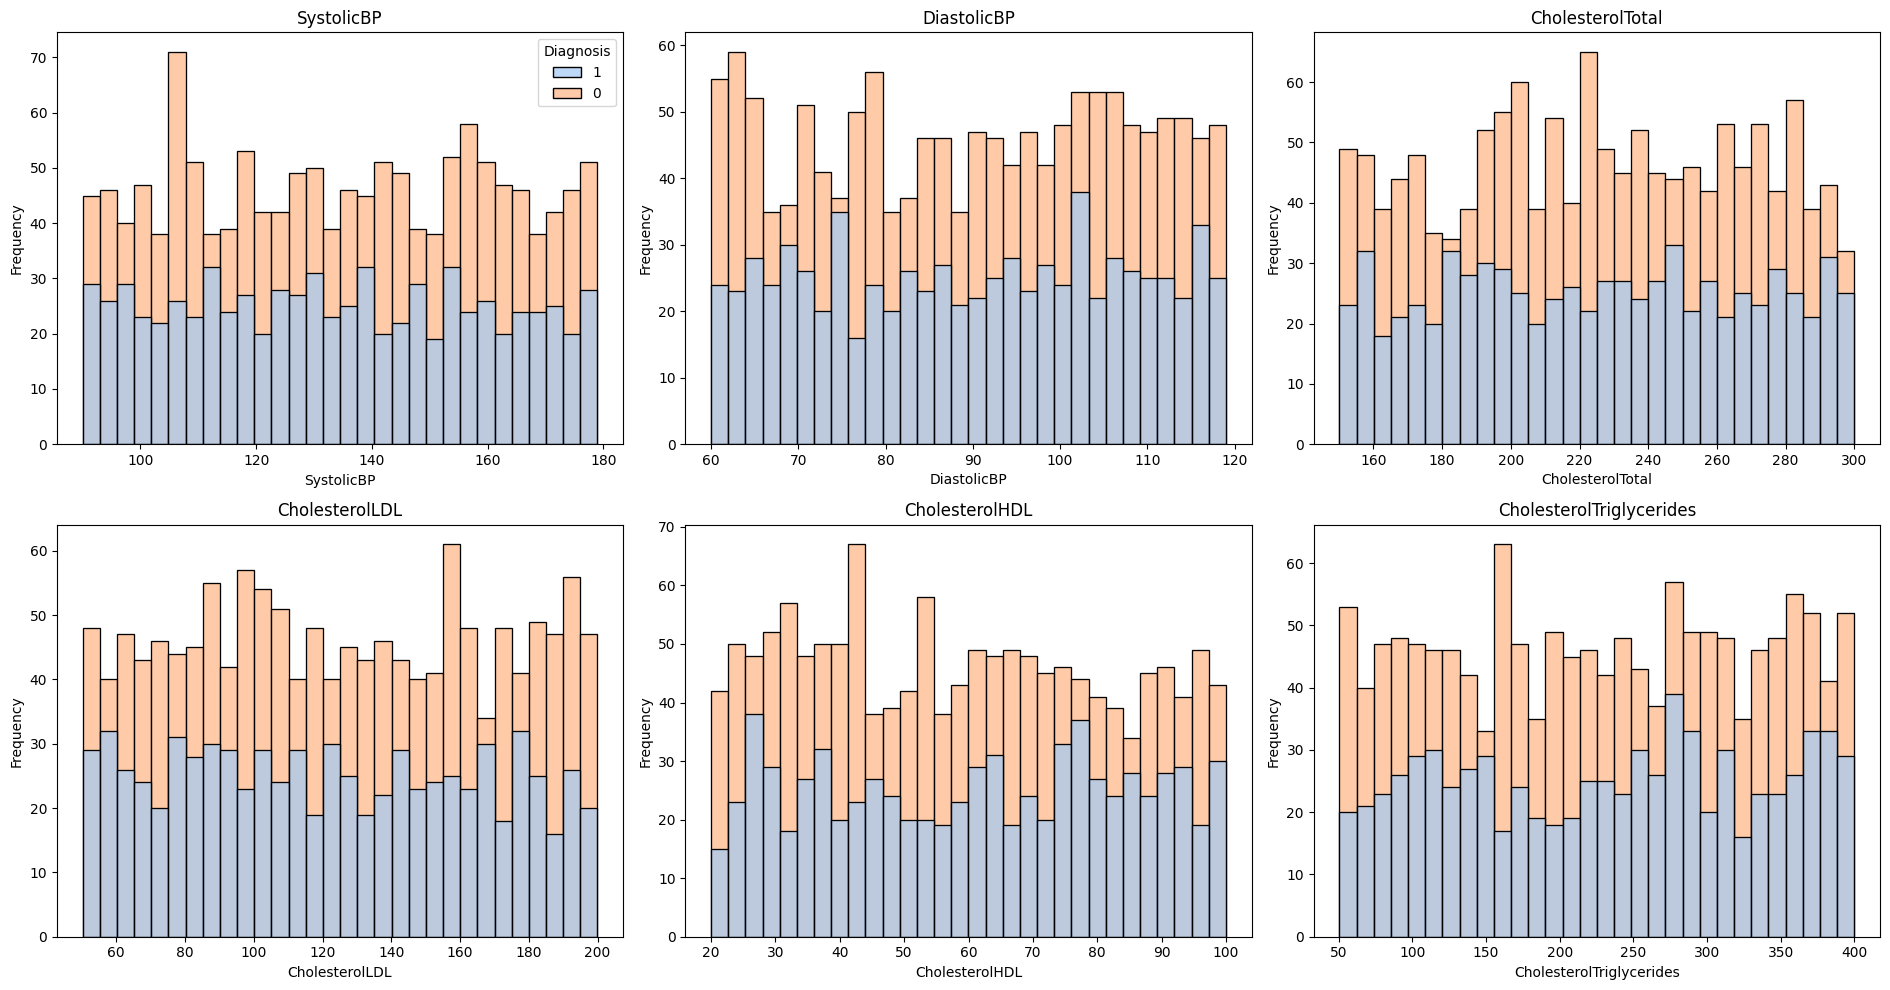

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(19, 10))

# Plotting each histogram of bio-markers
sns.histplot(ax=axes[0, 0], x='SystolicBP', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='SystolicBP')
axes[0, 0].set_xlabel('SystolicBP')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 1], x='DiastolicBP', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='DiastolicBP')
axes[0, 1].set_xlabel('DiastolicBP')
axes[0, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[0, 2], x='CholesterolTotal', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='CholesterolTotal')
axes[0, 2].set_xlabel('CholesterolTotal')
axes[0, 2].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 0], x='CholesterolLDL', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='CholesterolLDL')
axes[1, 0].set_xlabel('CholesterolLDL')
axes[1, 0].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 1], x='CholesterolHDL', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='CholesterolHDL')
axes[1, 1].set_xlabel('CholesterolHDL')
axes[1, 1].set_ylabel('Frequency')

sns.histplot(ax=axes[1, 2], x='CholesterolTriglycerides', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='CholesterolTriglycerides')
axes[1, 2].set_xlabel('CholesterolTriglycerides')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Above are plots of bio-marker levels and blood test results. The distributions between classes are relativily the same

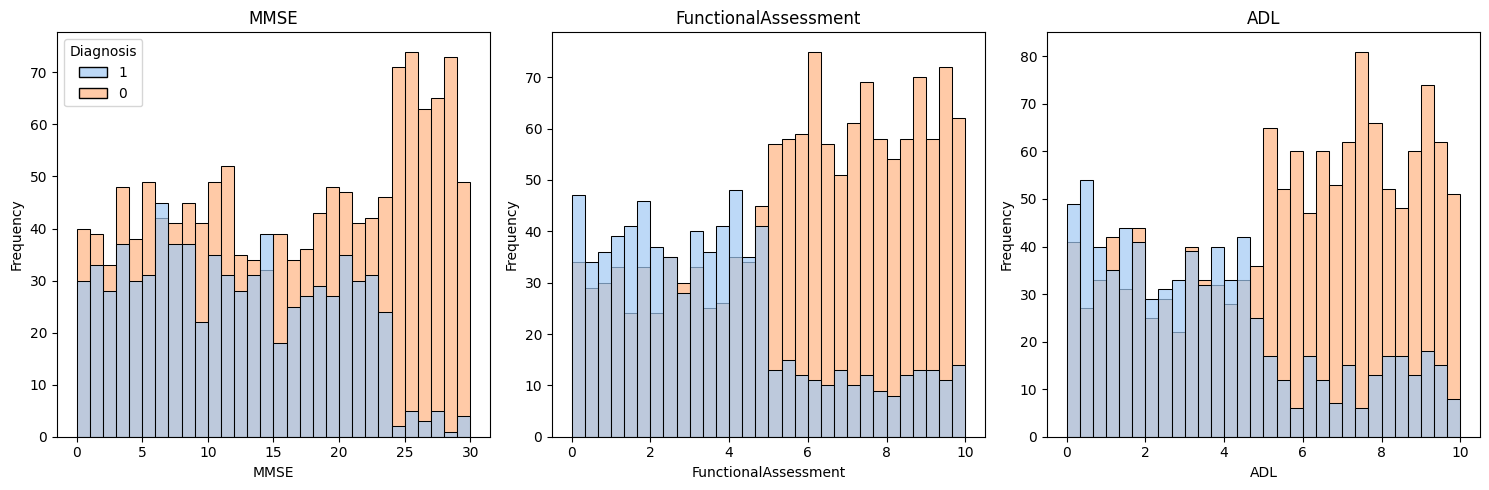

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each histogram of testing
sns.histplot(ax=axes[0], x='MMSE', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='MMSE')
axes[0].set_xlabel('MMSE')
axes[0].set_ylabel('Frequency')

sns.histplot(ax=axes[1], x='FunctionalAssessment', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='FunctionalAssessment')
axes[1].set_xlabel('FunctionalAssessment')
axes[1].set_ylabel('Frequency')

sns.histplot(ax=axes[2], x='ADL', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', legend=False, alpha=.7).set(title='ADL')
axes[2].set_xlabel('ADL')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The above charts show testing results, they all show similar distributions with the positive class being right skewed

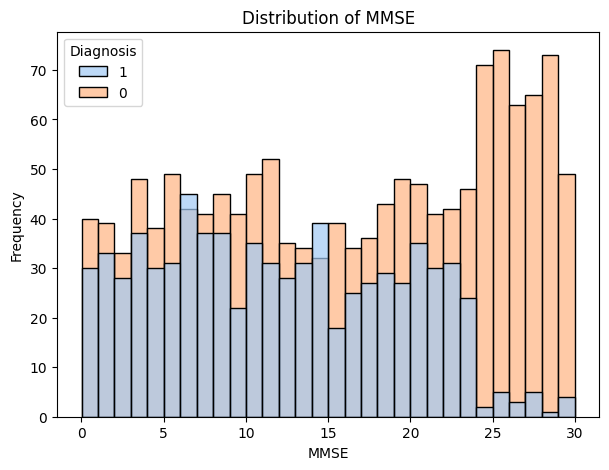

In [21]:
fig, axes = plt.subplots(figsize=(7, 5))

# Plotting MMSE to copy into report
sns.histplot(x='MMSE', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of MMSE')
plt.xlabel('MMSE')
plt.ylabel('Frequency')
plt.show()

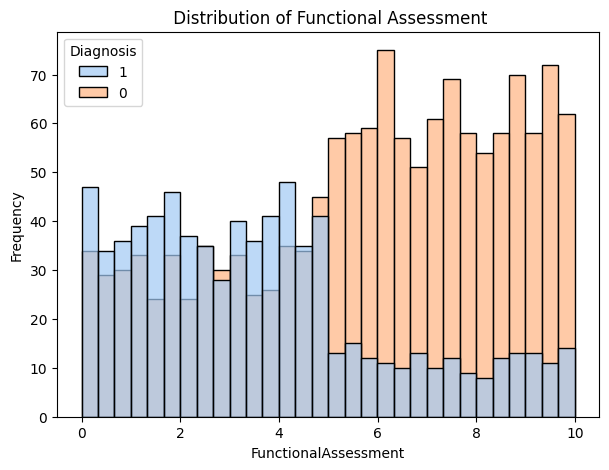

In [22]:
fig, axes = plt.subplots(figsize=(7, 5))

# plotting FunctionalAssesent to copy into report
sns.histplot(x='FunctionalAssessment', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title=' Distribution of Functional Assessment')
plt.xlabel('FunctionalAssessment')
plt.ylabel('Frequency')
plt.show()

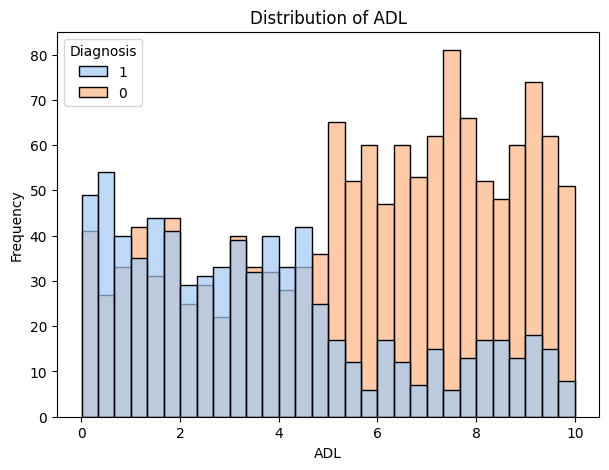

In [23]:
fig, axes = plt.subplots(figsize=(7, 5))

# plotting ADL to copy into report
sns.histplot(x='ADL', data=df, hue='Diagnosis', hue_order=hue_order, bins=30, palette='pastel', alpha=.7).set(title='Distribution of ADL')
plt.xlabel('ADL')
plt.ylabel('Frequency')

plt.show()

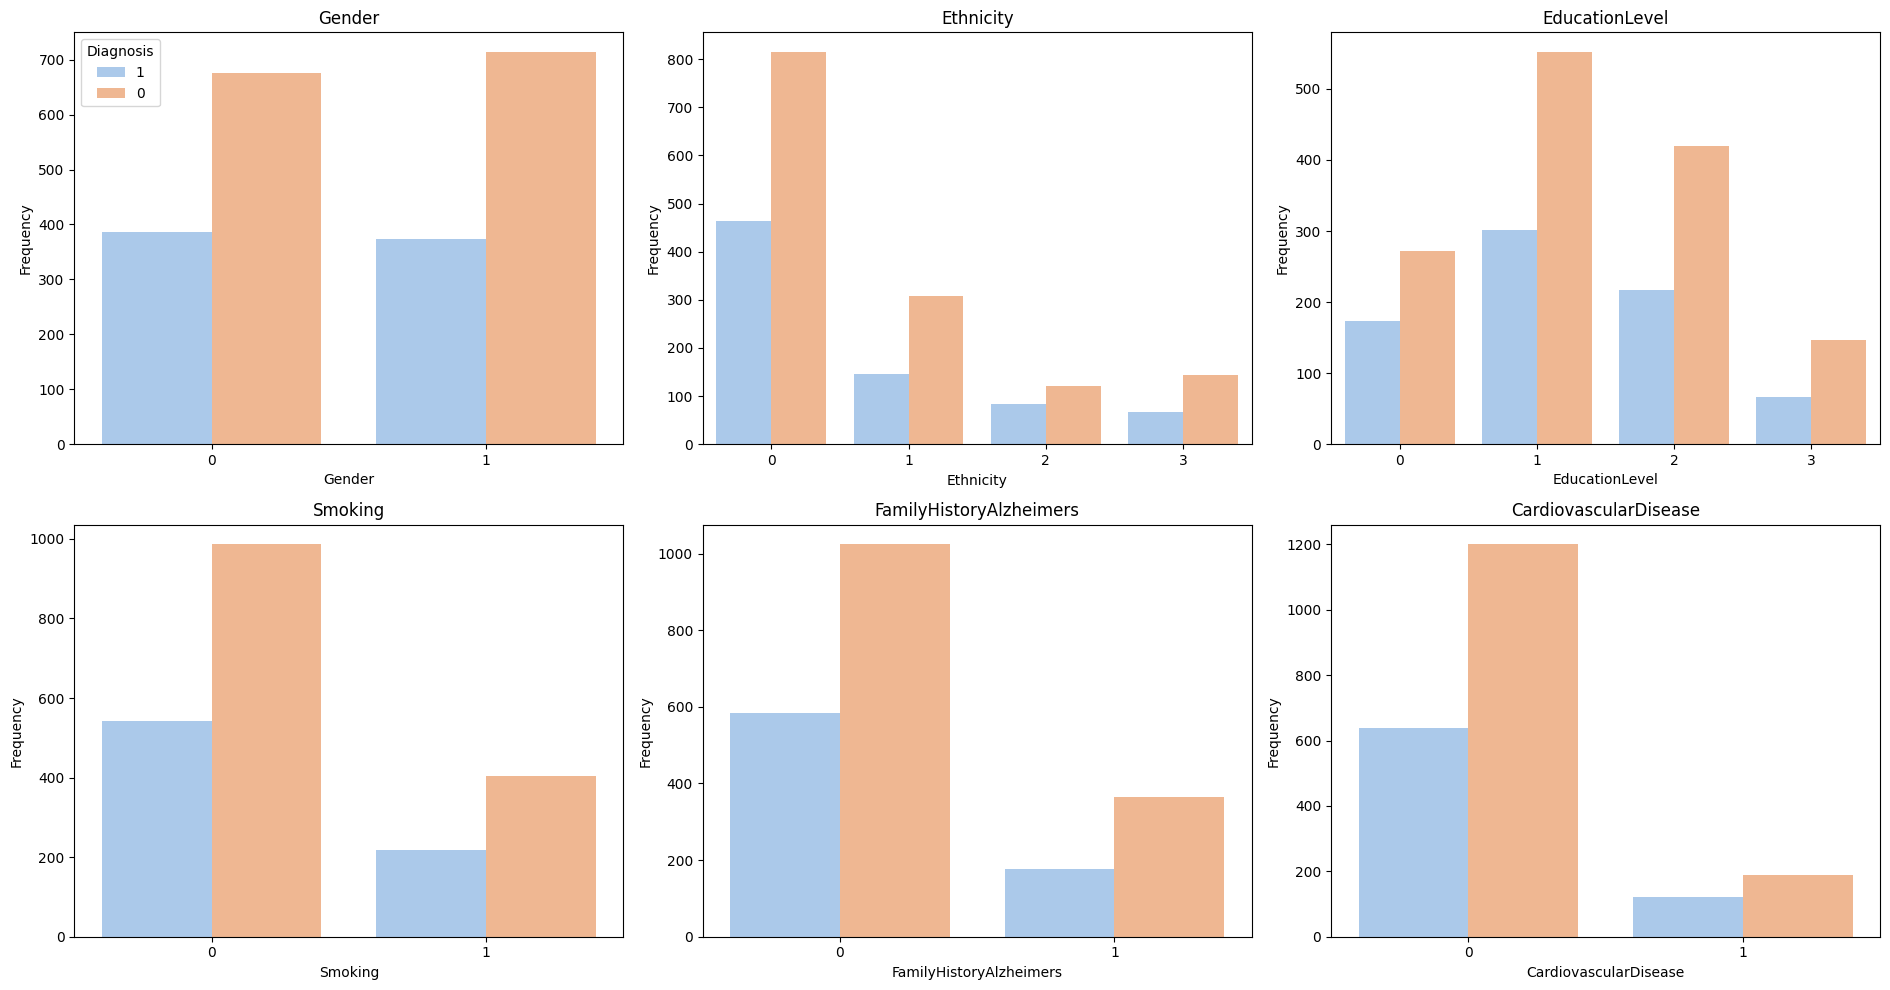

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(19, 10))

# Plotting each countplots with catagorical features
sns.countplot(ax=axes[0, 0], x='Gender', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(ax=axes[0, 1], x='Ethnicity', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='Ethnicity')
axes[0, 1].set_xlabel('Ethnicity')
axes[0, 1].set_ylabel('Frequency')

sns.countplot(ax=axes[0, 2], x='EducationLevel', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='EducationLevel')
axes[0, 2].set_xlabel('EducationLevel')
axes[0, 2].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 0], x='Smoking', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='Smoking')
axes[1, 0].set_xlabel('Smoking')
axes[1, 0].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 1], x='FamilyHistoryAlzheimers', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='FamilyHistoryAlzheimers')
axes[1, 1].set_xlabel('FamilyHistoryAlzheimers')
axes[1, 1].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 2], x='CardiovascularDisease', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='CardiovascularDisease')
axes[1, 2].set_xlabel('CardiovascularDisease')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

All the above countplots show the same relative counts between the two classes for each feature

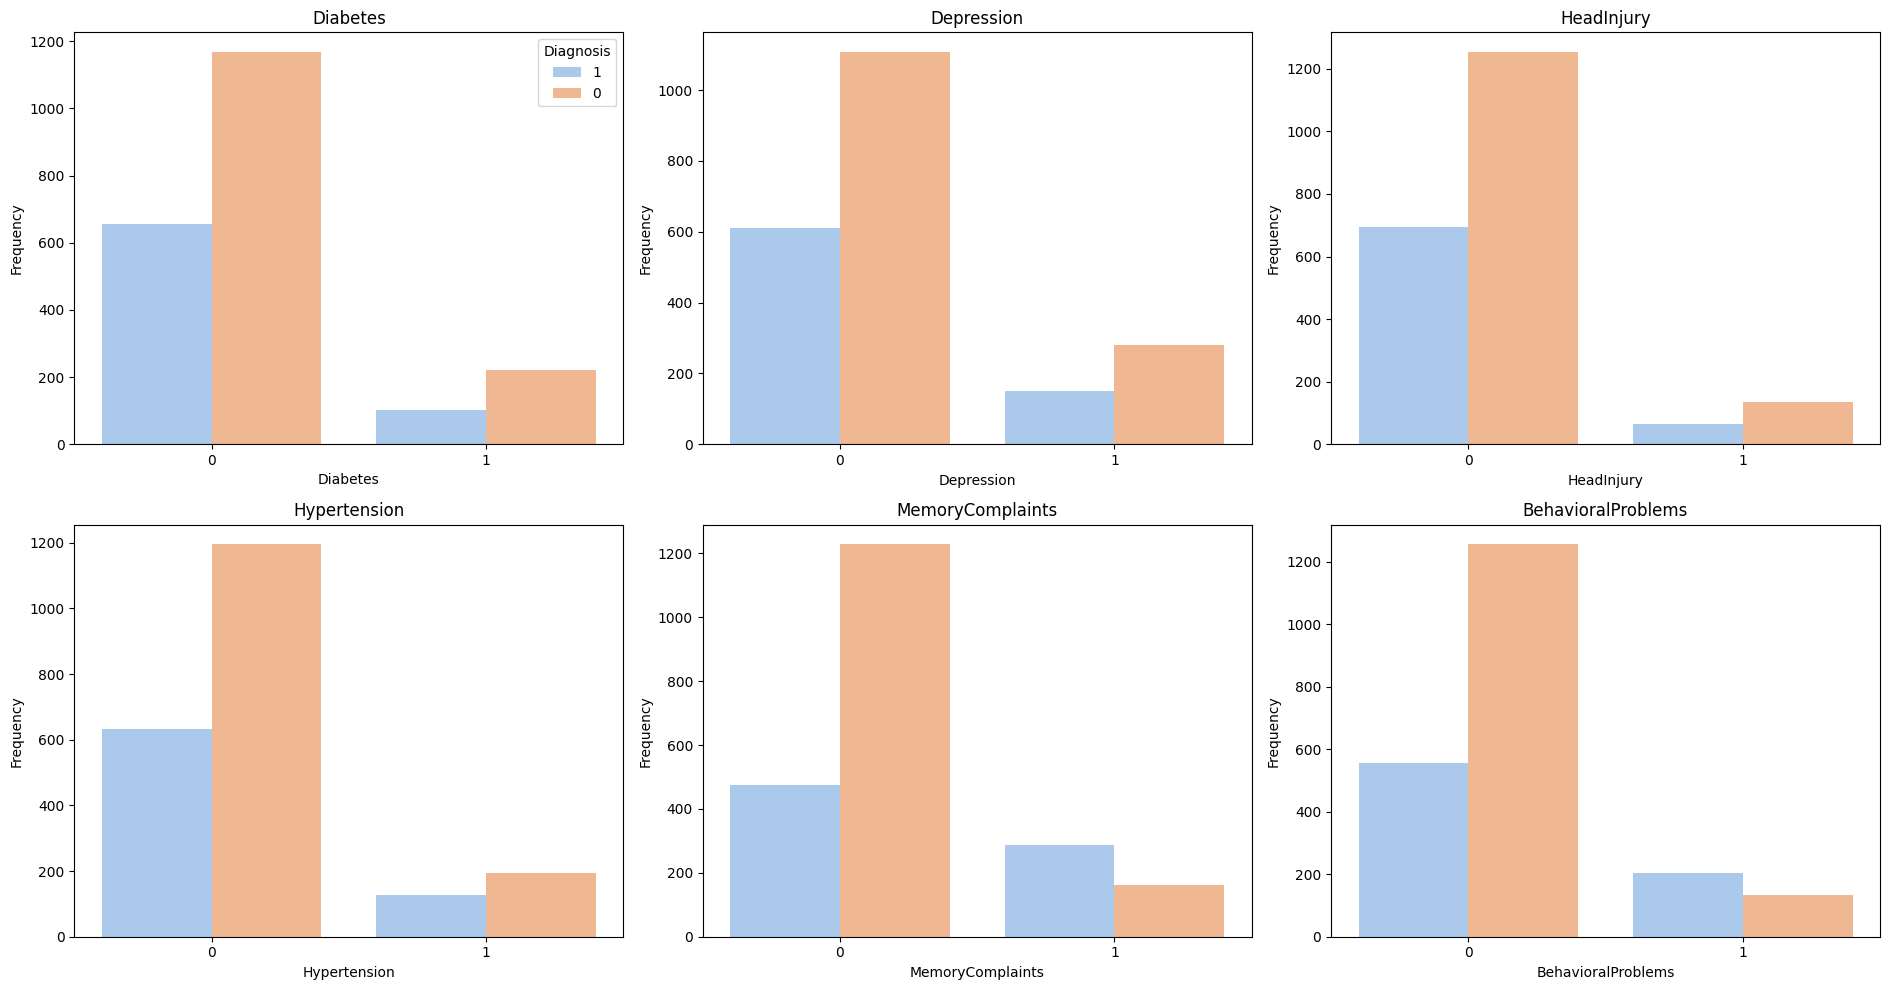

In [25]:
fig, axes = plt.subplots(2, 3, figsize=(19, 10))

# Plotting each countplot with the categorical featues
sns.countplot(ax=axes[0, 0], x='Diabetes', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Diabetes')
axes[0, 0].set_xlabel('Diabetes')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(ax=axes[0, 1], x='Depression', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='Depression')
axes[0, 1].set_xlabel('Depression')
axes[0, 1].set_ylabel('Frequency')

sns.countplot(ax=axes[0, 2], x='HeadInjury', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='HeadInjury')
axes[0, 2].set_xlabel('HeadInjury')
axes[0, 2].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 0], x='Hypertension', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='Hypertension')
axes[1, 0].set_xlabel('Hypertension')
axes[1, 0].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 1], x='MemoryComplaints', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='MemoryComplaints')
axes[1, 1].set_xlabel('MemoryComplaints')
axes[1, 1].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 2], x='BehavioralProblems', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='BehavioralProblems')
axes[1, 2].set_xlabel('BehavioralProblems')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Here we see a lot of the same as the previous plot except for memory complaints and behavioral problems we see the count of classes flip in the positive case

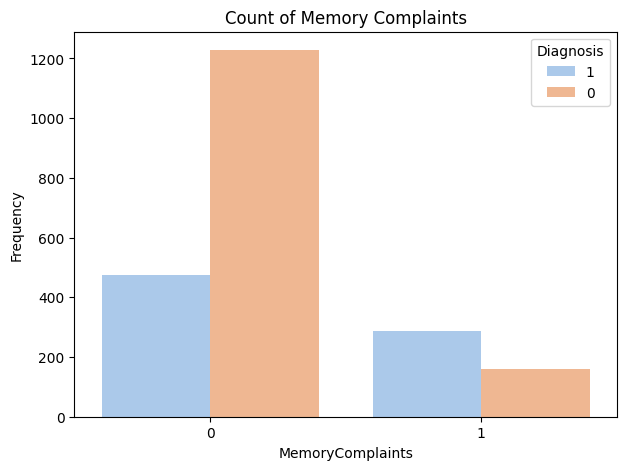

In [26]:
fig, axes = plt.subplots(figsize=(7, 5))

# single chart view of memory complaints for report
sns.countplot(x='MemoryComplaints', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Memory Complaints')
plt.xlabel('MemoryComplaints')
plt.ylabel('Frequency')
plt.show()

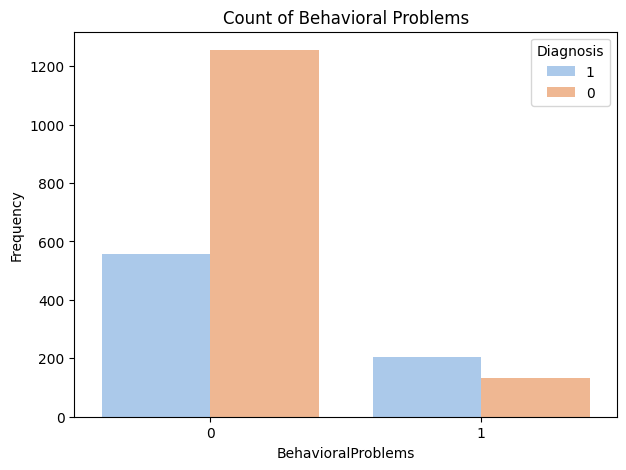

In [27]:
fig, axes = plt.subplots(figsize=(7, 5))

# single chart view of Behavioral problems for report
sns.countplot(x='BehavioralProblems', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Count of Behavioral Problems')
plt.xlabel('BehavioralProblems')
plt.ylabel('Frequency')
plt.show()

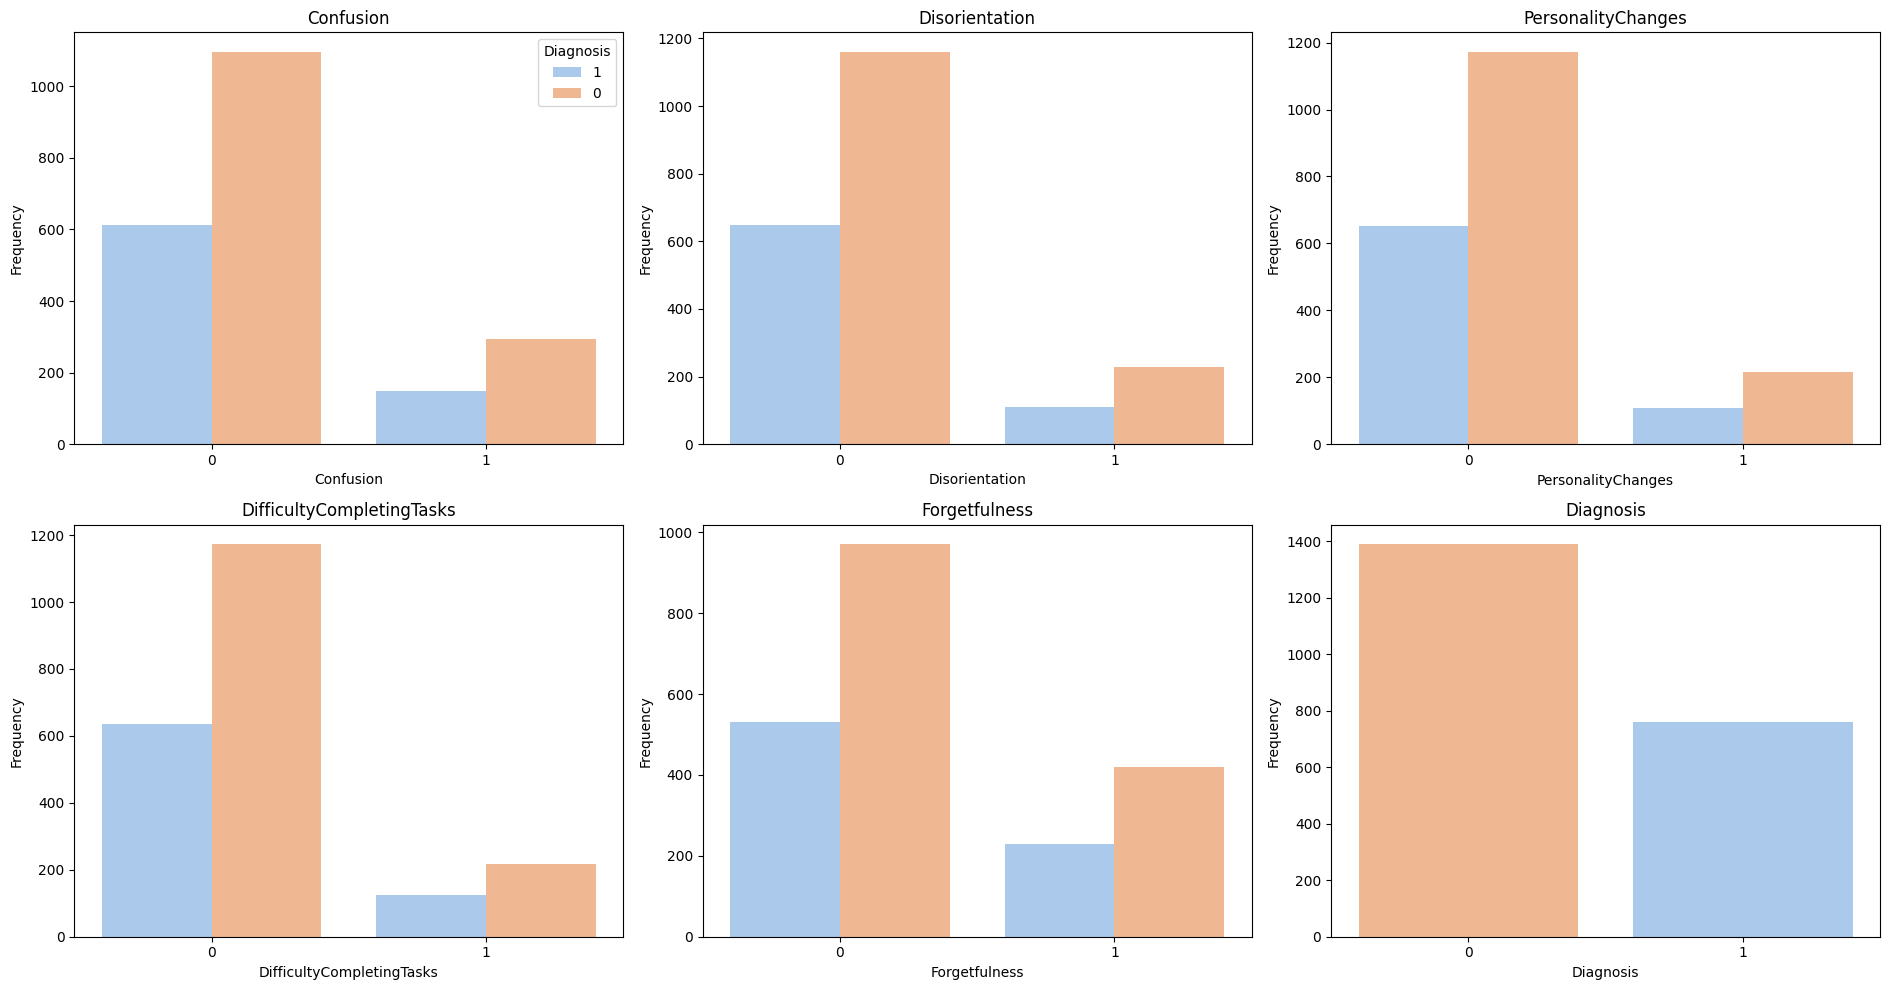

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(19, 10))

# Plotting each countplot with the remaining categorical features
sns.countplot(ax=axes[0, 0], x='Confusion', data=df, hue='Diagnosis', palette='pastel', hue_order=hue_order).set(title='Confusion')
axes[0, 0].set_xlabel('Confusion')
axes[0, 0].set_ylabel('Frequency')

sns.countplot(ax=axes[0, 1], x='Disorientation', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='Disorientation')
axes[0, 1].set_xlabel('Disorientation')
axes[0, 1].set_ylabel('Frequency')

sns.countplot(ax=axes[0, 2], x='PersonalityChanges', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='PersonalityChanges')
axes[0, 2].set_xlabel('PersonalityChanges')
axes[0, 2].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 0], x='DifficultyCompletingTasks', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='DifficultyCompletingTasks')
axes[1, 0].set_xlabel('DifficultyCompletingTasks')
axes[1, 0].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 1], x='Forgetfulness', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='Forgetfulness')
axes[1, 1].set_xlabel('Forgetfulness')
axes[1, 1].set_ylabel('Frequency')

sns.countplot(ax=axes[1, 2], x='Diagnosis', data=df, hue='Diagnosis', palette='pastel', legend=False, hue_order=hue_order).set(title='Diagnosis')
axes[1, 2].set_xlabel('Diagnosis')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

the above plots show more of the same count distributions between both classes

<Axes: >

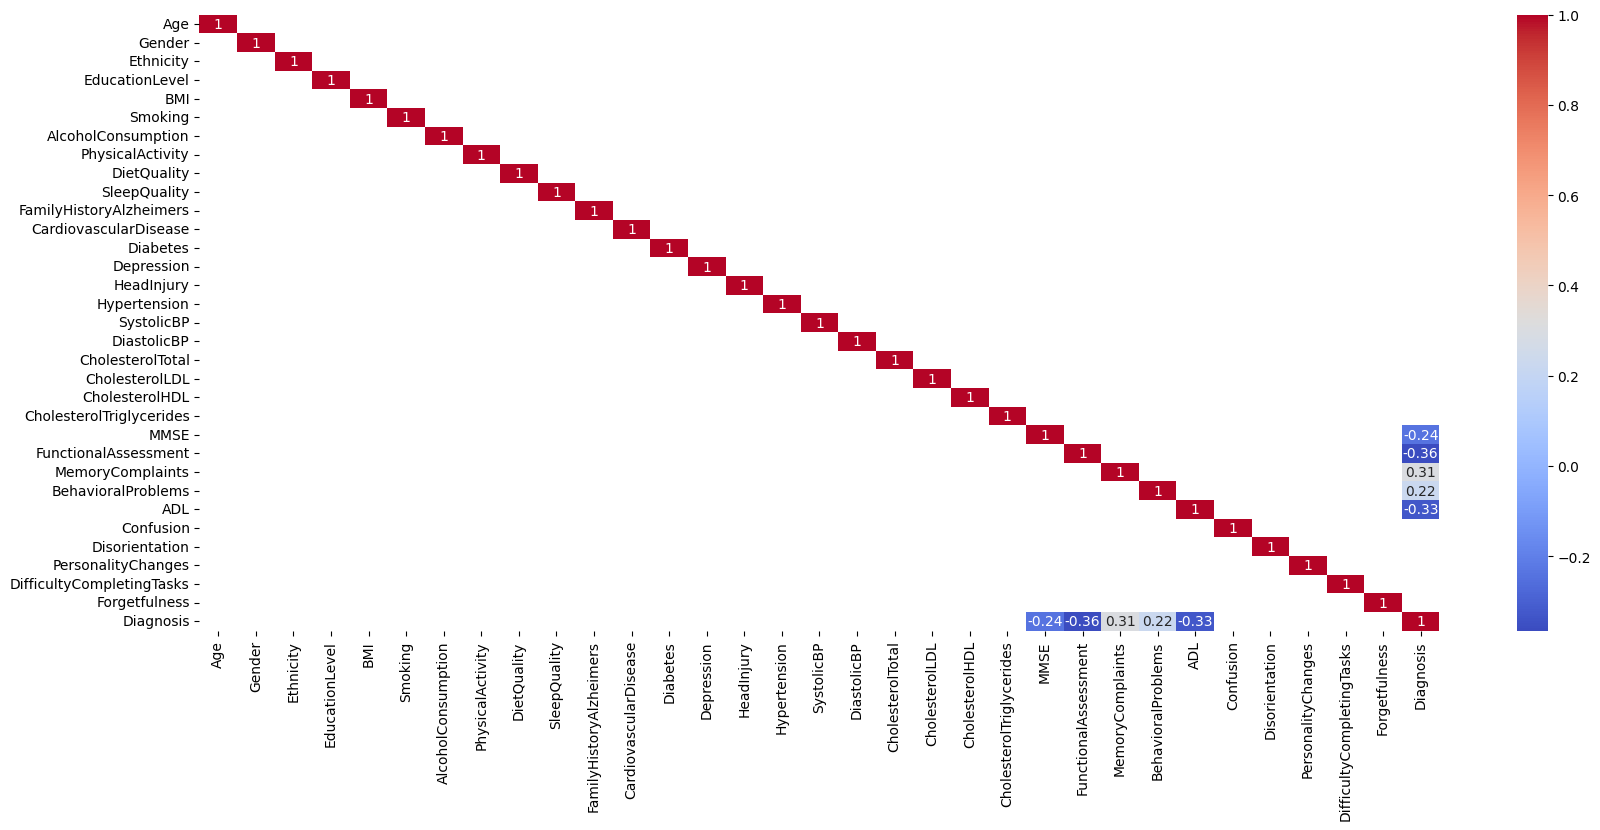

In [29]:
fig, axes = plt.subplots(figsize = (20, 8))

corr_matrix_test = df.corr(numeric_only=True)
corr_filtered_test = corr_matrix_test[np.abs(corr_matrix_test) > 0.2]
# Create a heatmap
sns.heatmap(corr_filtered_test, cmap='coolwarm', annot = True)

Heat map shows there is not much interactions between variables but there are some with decent interactions with the target variable. They happen to the features we notices differences in counts and distributions from above

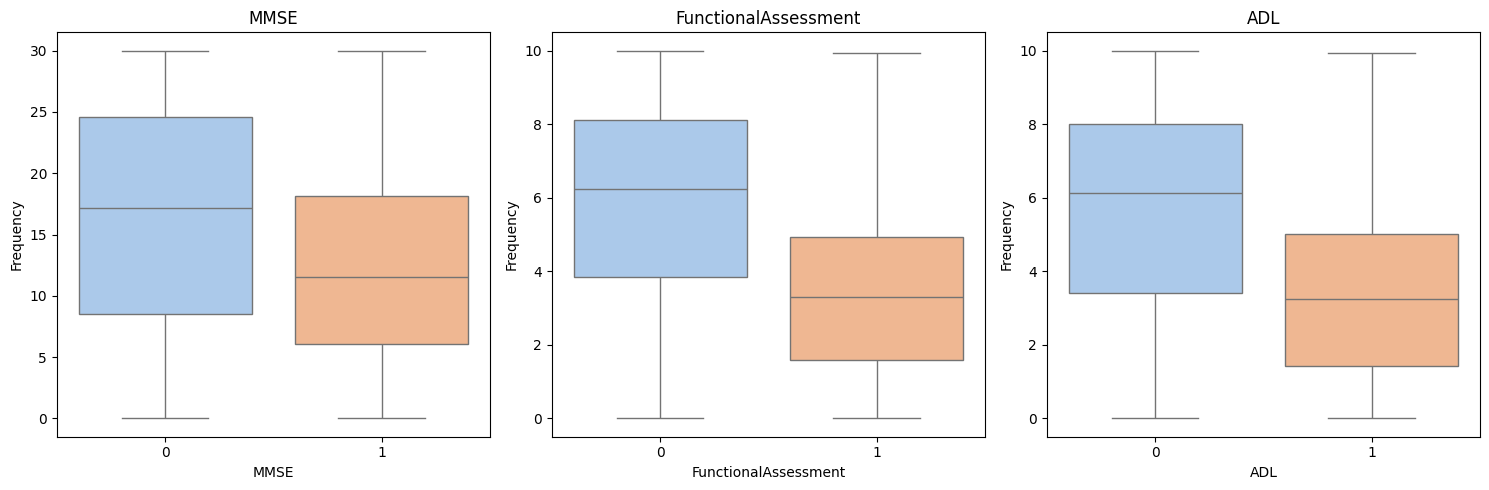

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotting each histogram with additional features
sns.boxplot(ax=axes[0], x='Diagnosis', y='MMSE', data=df, palette='pastel').set(title='MMSE')
axes[0].set_xlabel('MMSE')
axes[0].set_ylabel('Frequency')

sns.boxplot(ax=axes[1], x='Diagnosis', y='FunctionalAssessment', data=df, palette='pastel', legend=False).set(title='FunctionalAssessment')
axes[1].set_xlabel('FunctionalAssessment')
axes[1].set_ylabel('Frequency')

sns.boxplot(ax=axes[2], x='Diagnosis', y='ADL', data=df, palette='pastel', legend=False).set(title='ADL')
axes[2].set_xlabel('ADL')
axes[2].set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

another view of the plots with a right skew show an obious difference in means and quartile ranges. 

# Modeling

In [31]:
# Baseline Modeling
# defining x and y
x = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

rf_accuracy = list()
rf_cv_score = list()
rf_imp = list()

## Running 5 times CV
for i in range(5):
    print('loop: ', i+1)
    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
    
    for train_ix, test_ix in skf.split(x, y):
        
        ## Splitting the data 
        x_train, x_test = x.iloc[train_ix], x.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
    
        ## Building RF model ##
        rf_md = RandomForestClassifier(n_estimators = 1000, max_depth = 5).fit(x_train, y_train)
        # extracting feature importances
        rf_imp.append(rf_md.feature_importances_)
        ## Predicting on test
        rf_pred = rf_md.predict(x_test)
        
        ## Computing metrics
        rf_accuracy.append(accuracy_score(y_test, rf_pred))

rf_cv_score = np.mean(rf_accuracy)

print('The accuracy score of the rf model over 5-folds (run 5 times) is:', rf_cv_score)

loop:  1
loop:  2
loop:  3
loop:  4
loop:  5
The accuracy score of the rf model over 5-folds (run 5 times) is: 0.8892528866482355


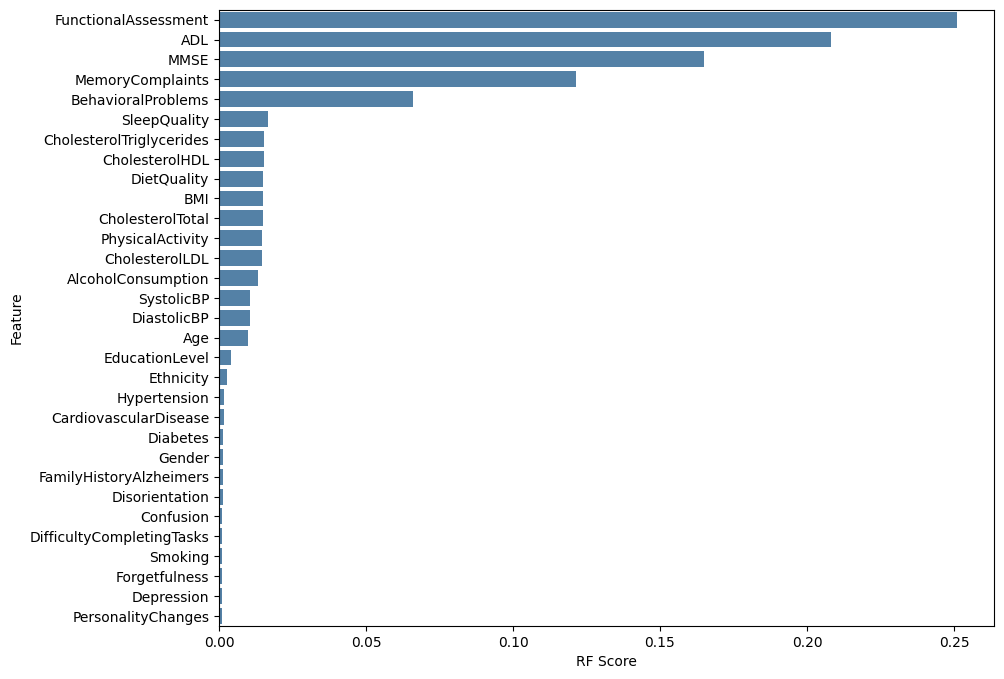

In [32]:
# Plotting importances
dat = pd.DataFrame(pd.DataFrame(rf_imp, columns = x.columns).apply(np.mean, axis = 0))
dat['Feature'] = dat.index
dat.columns = ['RF Score', 'Feature']
dat.reset_index(drop = True, inplace = True)
dat.sort_values(by = 'RF Score', ascending = False, inplace = True)
dat = dat[dat['RF Score'] > 0.0009]

fig, ax = plt.subplots(figsize = (10,8))
sns.barplot(data = dat, x = 'RF Score', y = 'Feature', color = 'steelblue')
plt.show()

The above chart shows the Random Forest importances ordered by impact to the model. Notice the top 5 important features to the model were the variables we covered in our exploratory analysis. 